In [1]:
# Useful imports for data manipulation and analysis
import numpy as np
import pandas as pd

In [2]:
# Useful imports for data visualisation
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the dataset
from data import load_data_viz_data

data = load_data_viz_data()
data[['LAT','LONG']] = data[['LAT','LONG']].astype('float64')

print("Shape of the DataFrame:", data.shape)

data.head()

Shape of the DataFrame: (237221, 9)


,INCIDENT_NUMBER,OFFENSE_CODE_GROUP,SHOOTING,OCCURRED_ON_DATE,LAT,LONG,NAME,LAT_POLICE_STATION,LONG_POLICE_STATION
0,I192068249,Other,0,2015-08-28 10:20:00,42.330119,-71.084251,Roxbury,42.328894,-71.085359
1,I182074094,Violence and harassment,0,2015-09-14 09:31:00,42.315142,-71.067047,Roxbury,42.328894,-71.085359
2,I182054888,Violence and harassment,0,2015-07-12 15:37:00,42.312243,-71.075499,Roxbury,42.328894,-71.085359
3,I182054888,Other,0,2015-07-12 15:37:00,42.312243,-71.075499,Roxbury,42.328894,-71.085359
4,I182054888,Other,0,2015-07-12 15:37:00,42.312243,-71.075499,Roxbury,42.328894,-71.085359


In [4]:
nb_offense_per_district = pd.DataFrame(data.groupby(['NAME'])['OFFENSE_CODE_GROUP'].value_counts())

In [5]:
nb_offense_per_district.head()

OFFENSE_CODE_GROUP
NAME     OFFENSE_CODE_GROUP                                
Brighton Larceny and vandalism                         5274
         Police investigation procedure                2783
         Fraud and law violations                      1807
         Violence and harassment                       1627
         Other                                          925

In [6]:
# Haversine distance function
from math import radians, sin, cos, asin, sqrt

def haversine_distance(lon1, lat1, lon2, lat2):
    """
    Compute distance (km) between two pairs of (lat, lng) coordinates
    See - (https://en.wikipedia.org/wiki/Haversine_formula)
    """
    
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    
    a = sin(dlat / 2) ** 2 + cos(lat1) * cos(lat2) * sin(dlon / 2) ** 2
    
    return 2 * 6371 * asin(sqrt(a))

In [7]:
# YOUR CODE HERE
dat = data.copy()
dat['distance_to_ps'] = dat.apply(lambda x: haversine_distance(x['LONG_POLICE_STATION'], x['LAT_POLICE_STATION'], x['LONG'], x['LAT']), axis =1)

In [8]:
ps_avg_dist = pd.DataFrame(dat.groupby(['NAME'])['distance_to_ps'].mean())
ps_avg_dist

,distance_to_ps
NAME,
Brighton,3.770867
Charlestown,58.758394
Dorchester,3.174444
Downtown,6.336657
East Boston,5.568626
Hyde Park,2.397613
Jamaica Plain,2.585737
Mattapan,1.908636
Roxbury,2.989029


The head of the Police Department of Boston, who read your report for the Mayor's team, was extremely interested in the results. He contacted your consulting firm for an additional presentation, that would focus on the nature of crimes that take place in Boston, the potential time trends that you could identify and/or the heterogeneity of the impact of criminality on the different police districts.

# The Nature of Crimes - Analysis

## Are time and distance to the crimescene a factor to higher crime rates?

We found that there are more crimes at nightime during weekends than during the week on general. However Larceny and vandalism, the most recurrent type of crime, does not have a preferred time during the day. Finally, if we take Brixton Police Station as an exemple, they intervene in a certain radius of their precincts but can occasionnaly go outside of it for intervention.

In [9]:
dat['OCCURRED_ON_DATE'] = pd.to_datetime(dat['OCCURRED_ON_DATE'])


In [10]:
print(dat['OCCURRED_ON_DATE'].dt.floor('15min').head(10))

0   2015-08-28 10:15:00
1   2015-09-14 09:30:00
2   2015-07-12 15:30:00
3   2015-07-12 15:30:00
4   2015-07-12 15:30:00
5   2015-09-02 09:00:00
6   2015-07-25 02:00:00
7   2015-11-12 12:00:00
8   2015-08-01 12:00:00
9   2015-12-01 12:00:00
Name: OCCURRED_ON_DATE, dtype: datetime64[ns]


In [11]:
print(dat['OCCURRED_ON_DATE'].dt.floor('15min').value_counts().head(10)) 

2015-06-18 05:00:00    28
2015-12-07 11:30:00    28
2016-12-15 06:00:00    28
2015-07-01 00:00:00    27
2017-06-01 00:00:00    27
2016-08-01 00:00:00    25
2017-08-01 00:00:00    25
2017-01-01 00:00:00    24
2018-12-13 00:00:00    24
2015-10-02 21:00:00    22
Name: OCCURRED_ON_DATE, dtype: int64


In [12]:
hourly_data = dat['OCCURRED_ON_DATE'].dt.floor('15min').value_counts()
hourly_data = hourly_data.sort_index()
print(hourly_data.head(10))

2015-06-15 00:00:00    10
2015-06-15 00:45:00     1
2015-06-15 01:00:00     1
2015-06-15 01:15:00     1
2015-06-15 01:30:00     3
2015-06-15 01:45:00     2
2015-06-15 02:00:00     4
2015-06-15 02:45:00     3
2015-06-15 03:00:00     1
2015-06-15 03:15:00     1
Name: OCCURRED_ON_DATE, dtype: int64


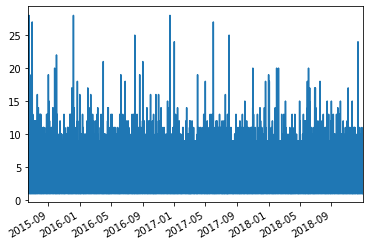

In [13]:
hourly_data.plot(kind="line")
plt.show()

In [14]:
quarters = dat['OCCURRED_ON_DATE'].dt.round('15min')
quarters= quarters.dt.minute
hours = dat['OCCURRED_ON_DATE'].dt.hour
week_day = dat['OCCURRED_ON_DATE'].dt.weekday
date = dat['OCCURRED_ON_DATE'].dt.date
weekly_data = pd.concat([week_day, hours, quarters, date], axis=1)
weekly_data.columns = ["Week Day", "Hour", "Quarter", "Date"]
print(weekly_data.tail(10))

        Week Day  Hour  Quarter        Date
237211         0    15        0  2018-01-01
237212         1    12       45  2018-01-02
237213         1     5       30  2018-01-02
237214         0    12        0  2018-01-01
237215         3    18        0  2018-08-09
237216         3    18        0  2018-08-09
237217         3    18        0  2018-08-09
237218         2     5        0  2018-12-12
237219         2     5        0  2018-12-12
237220         2     5        0  2018-12-12


In [15]:
import calendar

In [16]:
#Map the name
weekly_data["Week Day"] = weekly_data["Week Day"].apply(lambda x: calendar.day_name[x])
print(weekly_data["Week Day"].head(10))

0       Friday
1       Monday
2       Sunday
3       Sunday
4       Sunday
5    Wednesday
6     Saturday
7     Thursday
8     Saturday
9      Tuesday
Name: Week Day, dtype: object


In [17]:
weekly_data = weekly_data.groupby(["Date","Week Day", "Hour", "Quarter"]).size()
print(weekly_data.head(10))

Date        Week Day  Hour  Quarter
2015-06-15  Monday    0     0          10
                            45          1
                      1     0           3
                            30          2
                            45          2
                      2     0           2
                            15          2
                            45          3
                      3     0           1
                            15          1
dtype: int64


In [18]:
#Reset the index
weekly_data = weekly_data.reset_index()
print(weekly_data.head(10))

         Date Week Day  Hour  Quarter   0
0  2015-06-15   Monday     0        0  10
1  2015-06-15   Monday     0       45   1
2  2015-06-15   Monday     1        0   3
3  2015-06-15   Monday     1       30   2
4  2015-06-15   Monday     1       45   2
5  2015-06-15   Monday     2        0   2
6  2015-06-15   Monday     2       15   2
7  2015-06-15   Monday     2       45   3
8  2015-06-15   Monday     3        0   1
9  2015-06-15   Monday     3       15   1


In [19]:
#Rename 0, the default column name to be size
weekly_data = weekly_data.rename(columns={0: "Size"})
print(weekly_data.head(10))

         Date Week Day  Hour  Quarter  Size
0  2015-06-15   Monday     0        0    10
1  2015-06-15   Monday     0       45     1
2  2015-06-15   Monday     1        0     3
3  2015-06-15   Monday     1       30     2
4  2015-06-15   Monday     1       45     2
5  2015-06-15   Monday     2        0     2
6  2015-06-15   Monday     2       15     2
7  2015-06-15   Monday     2       45     3
8  2015-06-15   Monday     3        0     1
9  2015-06-15   Monday     3       15     1


In [20]:
weekly_data = weekly_data.groupby(["Week Day", "Hour", "Quarter"]).mean()["Size"]
print(weekly_data.head(10))

Week Day  Hour  Quarter
Friday    0     0          5.448087
                15         2.059829
                30         1.972222
                45         1.899083
          1     0          2.439716
                15         1.888889
                30         1.933884
                45         1.925620
          2     0          1.935185
                15         1.877551
Name: Size, dtype: float64


In [21]:
#Unstack takes a level of the index and translates it to be a column
#We pick level=0 because we want the week day name to be the column
weekly_data = weekly_data.unstack(level=0)
print(weekly_data)

Week Day        Friday    Monday  Saturday    Sunday  Thursday   Tuesday  \
Hour Quarter                                                               
0    0        5.448087  5.612022  5.708791  4.822222  5.697802  5.316940   
     15       2.059829  1.886792  2.368421  2.422222  1.973214  1.914894   
     30       1.972222  1.810811  2.516556  2.341772  2.072000  1.931624   
     45       1.899083  1.741071  2.326087  2.303448  1.854369  1.744681   
1    0        2.439716  2.102564  2.743902  2.964286  2.008000  2.052632   
     15       1.888889  1.640777  2.294118  2.426471  1.613861  1.857143   
     30       1.933884  1.989583  2.294521  2.820000  1.867257  2.000000   
     45       1.925620  1.698925  2.425197  2.443609  1.769231  1.867347   
2    0        1.935185  1.752577  2.304348  2.579310  1.830000  1.720930   
     15       1.877551  1.728261  2.489362  2.482014  1.680851  1.559524   
     30       1.935780  1.567010  2.347222  2.447368  1.808989  1.500000   
     45     

In [22]:
#Reindex allows you to re-arrange the columns however you would like
weekly_data = weekly_data.reindex(columns=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
print(weekly_data)

Week Day        Monday   Tuesday  Wednesday  Thursday    Friday  Saturday  \
Hour Quarter                                                                
0    0        5.612022  5.316940   5.472826  5.697802  5.448087  5.708791   
     15       1.886792  1.914894   1.767241  1.973214  2.059829  2.368421   
     30       1.810811  1.931624   1.880734  2.072000  1.972222  2.516556   
     45       1.741071  1.744681   1.963303  1.854369  1.899083  2.326087   
1    0        2.102564  2.052632   2.027523  2.008000  2.439716  2.743902   
     15       1.640777  1.857143   1.752577  1.613861  1.888889  2.294118   
     30       1.989583  2.000000   1.861702  1.867257  1.933884  2.294521   
     45       1.698925  1.867347   1.590909  1.769231  1.925620  2.425197   
2    0        1.752577  1.720930   1.752475  1.830000  1.935185  2.304348   
     15       1.728261  1.559524   1.939759  1.680851  1.877551  2.489362   
     30       1.567010  1.500000   1.765432  1.808989  1.935780  2.347222   

In [23]:
i = hourly_data.index.weekday <= 4

h_week = hourly_data.loc[i].groupby(hourly_data.loc[i].index.minute).mean()
h_weekend = hourly_data.loc[~i].groupby(hourly_data.loc[~i].index.minute).mean()
h = pd.concat([h_week, h_weekend], axis=1)
h.columns = ["Weekday", "Weekend"]
print(h)

     Weekday   Weekend
0   3.370352  3.015563
15  2.342721  2.143830
30  2.634154  2.359129
45  2.360517  2.101829


In [24]:
week_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
week_end = ['Saturday', 'Sunday']
weekday_data = weekly_data[week_days].mean(axis=1)
weekend_data = weekly_data[week_end].mean(axis=1)

## At what time, do we see the most crimes ?

### We have to make a distinction between Weekends and Weekdays and if it is during the day or the night. As shown by the plot below, there is more crimes during daytime during the week and more crimes at night during the weekends. We also saw on average 5 crimes when midnight strikes...

/Users/utilisateur/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/pandas/plotting/_core.py:396: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


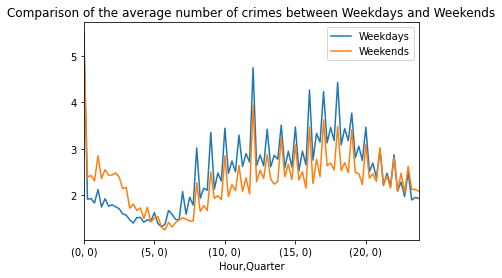

In [25]:
plot_days = pd.DataFrame()
plot_days['Weekdays'] = weekday_data
plot_days['Weekends'] = weekend_data
plot_days[['Weekdays','Weekends']].plot()
plt.title('Comparison of the average number of crimes between Weekdays and Weekends')
plt.show()

# Distance to the Police Station of the district
## Example of Brighton

In [27]:
import folium as folium
from folium.plugins import HeatMap

In [28]:
da = dat.loc[dat["NAME"] == "Brighton"].copy()
da.head()

,INCIDENT_NUMBER,OFFENSE_CODE_GROUP,SHOOTING,OCCURRED_ON_DATE,LAT,LONG,NAME,LAT_POLICE_STATION,LONG_POLICE_STATION,distance_to_ps
170152,I182031354,Fraud and law violations,0,2015-09-15 11:00:00,42.344388,-71.140586,Brighton,42.3493,-71.1506,0.987733
170153,I172094797,Police investigation procedure,0,2015-07-01 00:01:00,42.341349,-71.151228,Brighton,42.3493,-71.1506,0.885565
170154,I172065676,Fraud and law violations,0,2015-11-24 00:00:00,42.344980,-71.140906,Brighton,42.3493,-71.1506,0.930293
170155,I172017856,Violence and harassment,0,2015-11-01 00:00:00,42.344258,-71.143836,Brighton,42.3493,-71.1506,0.789514
170156,I162105751,Violence and harassment,0,2015-09-10 09:00:00,42.351071,-71.125702,Brighton,42.3493,-71.1506,2.055543


In [29]:
da.shape

(13788, 10)

In [30]:
da['LAT_POLICE_STATION'].iloc[0]

42.3493

In [31]:
da["Weight"] = .1
lat_ps = da['LAT_POLICE_STATION'].iloc[0]
long_ps = da['LONG_POLICE_STATION'].iloc[0]
lat_lon = da[["LAT", "LONG", "Weight"]].values[:13788]
da_map = folium.Map(location=[lat_ps, long_ps], zoom_start=13)
folium.Marker(location=[lat_ps, long_ps], popup = 'Police Station').add_to(da_map)
#Now let's increase radius since the weights are less
HeatMap(lat_lon, radius=15).add_to(da_map)
da_map

This map shows us that policemen from the station do operates sometimes outside of what is expected of them, but mostly in a delimied radius around the police station (marker). 

In [32]:
nb_offense_per_district

OFFENSE_CODE_GROUP
NAME         OFFENSE_CODE_GROUP                                
Brighton     Larceny and vandalism                         5274
             Police investigation procedure                2783
             Fraud and law violations                      1807
             Violence and harassment                       1627
             Other                                          925
             Drugs and disorderly conduct                   809
             Disputes                                       563
Charlestown  Larceny and vandalism                         1671
             Police investigation procedure                1162
             Violence and harassment                        550
             Fraud and law violations                       428
             Drugs and disorderly conduct                   416
             Other                                          338
             Disputes                                       200
Dorchester   Larceny and vandalism                         9230
             Police investigation procedure                7428
             Violence and harassment                       4067
             Fraud and law violations                      3705
             Disputes                                      3066
             Other                                         2792
             Drugs and disorderly conduct                  2587
Downtown     Larceny and vandalism                         9256
             Police investigation procedure                5464
             Violence and harassment                       3497
             Fraud and law violations                      3245
             Drugs and disorderly conduct                  2510
             Other                                         2034
             Disputes                                       254
East Boston  Larceny and vandalism                         2911
             Police investigation procedure                1941
...                                                         ...
Mattapan     Other                                         2381
             Drugs and disorderly conduct                  1897
Roxbury      Larceny and vandalism                        10471
             Police investigation procedure                8030
             Violence and harassment                       5495
             Fraud and law violations                      4820
             Other                                         3571
             Disputes                                      3450
             Drugs and disorderly conduct                  3040
South Boston Larceny and vandalism                         5637
             Police investigation procedure                3523
             Violence and harassment                       2013
             Drugs and disorderly conduct                  1867
             Fraud and law violations                      1654
             Other                                         1327
             Disputes                                       596
South End    Larceny and vandalism                        14012
             Police investigation procedure                5540
             Violence and harassment                       3471
             Fraud and law violations                      3195
             Drugs and disorderly conduct                  2191
             Other                                         2090
             Disputes                                       759
West Roxbury Larceny and vandalism                         2915
             Police investigation procedure                2036
             Fraud and law violations                      1168
             Violence and harassment                       1089
             Other                                          880
             Drugs and disorderly conduct                   721
             Disputes                                       597

[84 rows x 1

In [33]:
nb_offense_per_district_pct = pd.DataFrame(data.groupby(['NAME'])['OFFENSE_CODE_GROUP'].value_counts(normalize = True)*100)

In [34]:
nb_offense_per_district_pct

OFFENSE_CODE_GROUP
NAME         OFFENSE_CODE_GROUP                                
Brighton     Larceny and vandalism                    38.250653
             Police investigation procedure           20.184218
             Fraud and law violations                 13.105599
             Violence and harassment                  11.800116
             Other                                     6.708732
             Drugs and disorderly conduct              5.867421
             Disputes                                  4.083261
Charlestown  Larceny and vandalism                    35.068206
             Police investigation procedure           24.386149
             Violence and harassment                  11.542497
             Fraud and law violations                  8.982162
             Drugs and disorderly conduct              8.730325
             Other                                     7.093389
             Disputes                                  4.197272
Dorchester   Larceny and vandalism                    28.076046
             Police investigation procedure           22.594677
             Violence and harassment                  12.371103
             Fraud and law violations                 11.269962
             Disputes                                  9.326236
             Other                                     8.492776
             Drugs and disorderly conduct              7.869202
Downtown     Larceny and vandalism                    35.247525
             Police investigation procedure           20.807312
             Violence and harassment                  13.316832
             Fraud and law violations                 12.357197
             Drugs and disorderly conduct              9.558264
             Other                                     7.745621
             Disputes                                  0.967251
East Boston  Larceny and vandalism                    30.038180
             Police investigation procedure           20.028893
...                                                         ...
Mattapan     Other                                     8.404222
             Drugs and disorderly conduct              6.695846
Roxbury      Larceny and vandalism                    26.933663
             Police investigation procedure           20.654886
             Violence and harassment                  14.134321
             Fraud and law violations                 12.398076
             Other                                     9.185380
             Disputes                                  8.874142
             Drugs and disorderly conduct              7.819533
South Boston Larceny and vandalism                    33.923091
             Police investigation procedure           21.201180
             Violence and harassment                  12.114100
             Drugs and disorderly conduct             11.235482
             Fraud and law violations                  9.953662
             Other                                     7.985798
             Disputes                                  3.586688
South End    Larceny and vandalism                    44.826924
             Police investigation procedure           17.723463
             Violence and harassment                  11.104357
             Fraud and law violations                 10.221383
             Drugs and disorderly conduct              7.009406
             Other                                     6.686288
             Disputes                                  2.428178
West Roxbury Larceny and vandalism                    30.990857
             Police investigation procedure           21.645758
             Fraud and law violations                 12.417606
             Violence and harassment                  11.577716
             Other                                     9.355730
             Drugs and disorderly conduct              7.665320
             Disputes                                  6.347013

[84 rows x 1

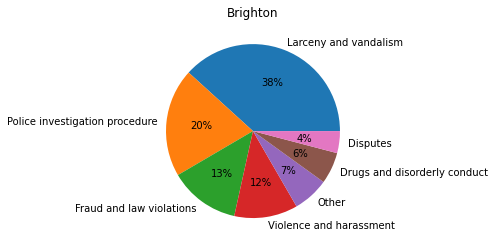

In [35]:
plt.pie(nb_offense_per_district_pct.loc['Brighton']['OFFENSE_CODE_GROUP'], labels = nb_offense_per_district_pct.loc['Brighton'].index, autopct='%1.0f%%')
plt.title('Brighton')
plt.show()

We have here the distribution of type of crimes commited within the Brighton Police Station's juridiction. 

## Larceny and Vandalism : First in line

In [36]:
each_offense_nb_per_district = pd.DataFrame(data.groupby(['OFFENSE_CODE_GROUP'])['NAME'].value_counts(normalize = True)*100)

We see that there are more of those crimes in the district of South End, Roxbury and Downtown.

In [37]:
off_district = each_offense_nb_per_district.unstack()

In [38]:
off_district

NAME                                    \
NAME                            Brighton Charlestown Dorchester   Downtown   
OFFENSE_CODE_GROUP                                                           
Disputes                        3.650866    1.296933  19.881979   1.647105   
Drugs and disorderly conduct    4.252970    2.186941  13.600042  13.195248   
Fraud and law violations        6.742286    1.596955  13.824111  12.107757   
Larceny and vandalism           6.936006    2.197585  12.138668  12.172861   
Other                           4.768287    1.742358  14.392494  10.485077   
Police investigation procedure  5.508709    2.300079  14.703088  10.815519   
Violence and harassment         5.419720    1.832112  13.547635  11.648901   

                                                                               \
NAME                           East Boston Hyde Park Jamaica Plain   Mattapan   
OFFENSE_CODE_GROUP                                                              
Disputes                          3.871344  7.437909      4.014007  23.169704   
Drugs and disorderly conduct      5.230785  4.484281      5.972032   9.972663   
Fraud and law violations          3.936420  5.205030      5.066975  11.085407   
Larceny and vandalism             3.828349  4.625319      5.978590   8.677240   
Other                             4.551781  5.577607      5.649776  12.273829   
Police investigation procedure    3.842043  5.934283      5.174188  13.857878   
Violence and harassment           4.360426  5.193205      4.773484  13.024650   

                                                                                
NAME                              Roxbury South Boston  South End West Roxbury  
OFFENSE_CODE_GROUP                                                              
Disputes                        22.372090     3.864860   4.921860     3.871344  
Drugs and disorderly conduct    15.981495     9.814951  11.518242     3.790348  
Fraud and law violations        17.984404     6.171412  11.921197     4.358046  
Larceny and vandalism           13.770746     7.413399  18.427628     3.833610  
Other                           18.408165     6.840559  10.773751     4.536316  
Police investigation procedure  15.894695     6.973476  10.965954     4.030087  
Violence and harassment         18.304464     6.705530  11.562292     3.627582

In [39]:
each_offense_nb_per_district.loc['Disputes']

,NAME
NAME,
Mattapan,23.169704
Roxbury,22.372090
Dorchester,19.881979
Hyde Park,7.437909
South End,4.921860
Jamaica Plain,4.014007
East Boston,3.871344
West Roxbury,3.871344
South Boston,3.864860


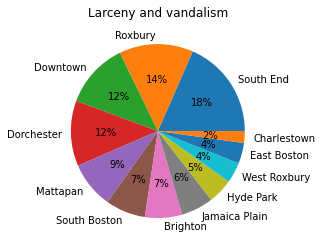

In [40]:
plt.pie(each_offense_nb_per_district.loc['Larceny and vandalism']['NAME'], labels = each_offense_nb_per_district.loc['Larceny and vandalism'].index, autopct='%1.0f%%')
plt.title('Larceny and vandalism')
plt.show()

In [41]:
each_offense_nb_per_district.index.levels

FrozenList([['Disputes', 'Drugs and disorderly conduct', 'Fraud and law violations', 'Larceny and vandalism', 'Other', 'Police investigation procedure', 'Violence and harassment'], ['Brighton', 'Charlestown', 'Dorchester', 'Downtown', 'East Boston', 'Hyde Park', 'Jamaica Plain', 'Mattapan', 'Roxbury', 'South Boston', 'South End', 'West Roxbury']])

In [42]:
d = dat.loc[dat['OFFENSE_CODE_GROUP'] == "Larceny and vandalism"].copy()
d.head()

,INCIDENT_NUMBER,OFFENSE_CODE_GROUP,SHOOTING,OCCURRED_ON_DATE,LAT,LONG,NAME,LAT_POLICE_STATION,LONG_POLICE_STATION,distance_to_ps
12,I162094061,Larceny and vandalism,0,2015-11-17 10:28:00,42.312525,-71.073893,Roxbury,42.328894,-71.085359,2.049737
21,I162075589,Larceny and vandalism,0,2015-11-11 00:00:00,42.335062,-71.093168,Roxbury,42.328894,-71.085359,0.939376
28,I162048090,Larceny and vandalism,0,2015-12-01 00:01:00,42.335515,-71.100832,Roxbury,42.328894,-71.085359,1.469618
29,I162038709,Larceny and vandalism,0,2015-09-29 10:02:00,42.328741,-71.087716,Roxbury,42.328894,-71.085359,0.194456
30,I162038102,Larceny and vandalism,0,2015-12-28 10:00:00,42.328100,-71.063217,Roxbury,42.328894,-71.085359,1.822383


In [43]:
hourly_xv = d['OCCURRED_ON_DATE'].dt.floor('15min').value_counts()
hourly_xv = hourly_xv.sort_index()
print(hourly_xv.head(10))

2015-06-15 00:00:00    2
2015-06-15 02:00:00    2
2015-06-15 03:00:00    1
2015-06-15 04:45:00    1
2015-06-15 05:15:00    1
2015-06-15 08:00:00    4
2015-06-15 09:00:00    3
2015-06-15 09:15:00    1
2015-06-15 10:00:00    2
2015-06-15 10:30:00    2
Name: OCCURRED_ON_DATE, dtype: int64


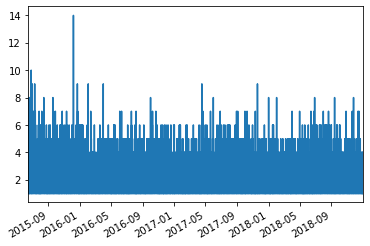

In [44]:
hourly_xv.plot(kind="line")
plt.show()

In [45]:
quarters = d['OCCURRED_ON_DATE'].dt.round('15min')
quarters= quarters.dt.minute
hours = d['OCCURRED_ON_DATE'].dt.hour
week_day = d['OCCURRED_ON_DATE'].dt.weekday
date = d['OCCURRED_ON_DATE'].dt.date
weekly_xv = pd.concat([week_day, hours, quarters, date], axis=1)
weekly_xv.columns = ["Week Day", "Hour", "Quarter", "Date"]
print(weekly_xv.tail(10))

        Week Day  Hour  Quarter        Date
237183         0     0        0  2018-01-08
237185         1    22        0  2018-01-09
237190         6    16        0  2018-01-07
237193         6    21       45  2018-01-07
237194         6     9        0  2018-01-07
237195         6     3        0  2018-01-07
237196         3    17        0  2018-01-11
237207         2    19       30  2018-01-03
237208         0     1       30  2018-01-01
237211         0    15        0  2018-01-01


In [46]:
#Map the name
weekly_xv["Week Day"] = weekly_xv["Week Day"].apply(lambda x: calendar.day_name[x])
print(weekly_xv["Week Day"].head(10))

12      Tuesday
21    Wednesday
28      Tuesday
29      Tuesday
30       Monday
31     Thursday
41    Wednesday
42      Tuesday
43      Tuesday
46     Saturday
Name: Week Day, dtype: object


In [47]:
weekly_xv = weekly_xv.groupby(["Date","Week Day", "Hour", "Quarter"]).size()
print(weekly_xv.head(10))

Date        Week Day  Hour  Quarter
2015-06-15  Monday    0     0          2
                      2     0          1
                            15         1
                      3     0          1
                      4     45         1
                      5     30         1
                      8     0          3
                            15         1
                      9     0          2
                            15         1
dtype: int64


In [48]:
#Reset the index
weekly_xv = weekly_xv.reset_index()
print(weekly_xv.head(10))

         Date Week Day  Hour  Quarter  0
0  2015-06-15   Monday     0        0  2
1  2015-06-15   Monday     2        0  1
2  2015-06-15   Monday     2       15  1
3  2015-06-15   Monday     3        0  1
4  2015-06-15   Monday     4       45  1
5  2015-06-15   Monday     5       30  1
6  2015-06-15   Monday     8        0  3
7  2015-06-15   Monday     8       15  1
8  2015-06-15   Monday     9        0  2
9  2015-06-15   Monday     9       15  1


In [49]:
#Rename 0, the default column name to be size
weekly_xv = weekly_xv.rename(columns={0: "Size"})
print(weekly_xv.head(10))

         Date Week Day  Hour  Quarter  Size
0  2015-06-15   Monday     0        0     2
1  2015-06-15   Monday     2        0     1
2  2015-06-15   Monday     2       15     1
3  2015-06-15   Monday     3        0     1
4  2015-06-15   Monday     4       45     1
5  2015-06-15   Monday     5       30     1
6  2015-06-15   Monday     8        0     3
7  2015-06-15   Monday     8       15     1
8  2015-06-15   Monday     9        0     2
9  2015-06-15   Monday     9       15     1


In [50]:
weekly_xv = weekly_xv.groupby(["Week Day", "Hour", "Quarter"]).mean()["Size"]
print(weekly_xv.head(10))

Week Day  Hour  Quarter
Friday    0     0          2.124183
                15         1.190476
                30         1.238095
                45         1.302326
          1     0          1.409639
                15         1.210526
                30         1.250000
                45         1.044444
          2     0          1.224138
                15         1.129032
Name: Size, dtype: float64


In [51]:
#Unstack takes a level of the index and translates it to be a column
#We pick level=0 because we want the week day name to be the column
weekly_xv = weekly_xv.unstack(level=0)
print(weekly_xv)

Week Day        Friday    Monday  Saturday    Sunday  Thursday   Tuesday  \
Hour Quarter                                                               
0    0        2.124183  2.244444  2.409091  2.041958  2.234043  2.141791   
     15       1.190476  1.219512  1.288136  1.413793  1.276596  1.209302   
     30       1.238095  1.185185  1.267606  1.272727  1.339623  1.142857   
     45       1.302326  1.071429  1.372093  1.196429  1.375000  1.230769   
1    0        1.409639  1.322581  1.490000  1.556522  1.313433  1.462687   
     15       1.210526  1.228571  1.239130  1.296875  1.181818  1.111111   
     30       1.250000  1.365854  1.292308  1.545455  1.150000  1.428571   
     45       1.044444  1.156250  1.296296  1.357143  1.129032  1.218750   
2    0        1.224138  1.169811  1.333333  1.505376  1.250000  1.333333   
     15       1.129032  1.205882  1.534483  1.265625  1.111111  1.088235   
     30       1.162791  1.166667  1.357143  1.310345  1.150000  1.131579   
     45     

In [52]:
#Reindex allows you to re-arrange the columns however you would like
weekly_xv = weekly_xv.reindex(columns=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
print(weekly_xv)

Week Day        Monday   Tuesday  Wednesday  Thursday    Friday  Saturday  \
Hour Quarter                                                                
0    0        2.244444  2.141791   2.150685  2.234043  2.124183  2.409091   
     15       1.219512  1.209302   1.263158  1.276596  1.190476  1.288136   
     30       1.185185  1.142857   1.297297  1.339623  1.238095  1.267606   
     45       1.071429  1.230769   1.318182  1.375000  1.302326  1.372093   
1    0        1.322581  1.462687   1.431034  1.313433  1.409639  1.490000   
     15       1.228571  1.111111   1.161290  1.181818  1.210526  1.239130   
     30       1.365854  1.428571   1.277778  1.150000  1.250000  1.292308   
     45       1.156250  1.218750   1.194444  1.129032  1.044444  1.296296   
2    0        1.169811  1.333333   1.262295  1.250000  1.224138  1.333333   
     15       1.205882  1.088235   1.114286  1.111111  1.129032  1.534483   
     30       1.166667  1.131579   1.205882  1.150000  1.162791  1.357143   

In [53]:
i = hourly_xv.index.weekday <= 4

h_week = hourly_xv.loc[i].groupby(hourly_xv.loc[i].index.minute).mean()
h_weekend = hourly_xv.loc[~i].groupby(hourly_xv.loc[~i].index.minute).mean()
h = pd.concat([h_week, h_weekend], axis=1)
h.columns = ["Weekday", "Weekend"]
print(h)

     Weekday   Weekend
0   1.771239  1.757708
15  1.319020  1.292820
30  1.454584  1.405046
45  1.322607  1.315174


In [54]:
week_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
week_end = ['Saturday', 'Sunday']
weekday_xv = weekly_xv[week_days].mean(axis=1)
weekend_xv = weekly_xv[week_end].mean(axis=1)

/Users/utilisateur/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/pandas/plotting/_core.py:396: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


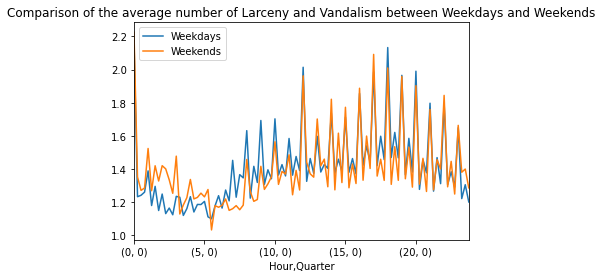

In [55]:
plot_days = pd.DataFrame()
plot_days['Weekdays'] = weekday_xv
plot_days['Weekends'] = weekend_xv
plot_days[['Weekdays','Weekends']].plot()
plt.title('Comparison of the average number of Larceny and Vandalism between Weekdays and Weekends')
plt.show()

We can see that there is not a clear trend between the time of the days and when an act of larceny and vandalism is commited.